In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
X = df.drop(['income'], axis=1)
y = df['income']

In [9]:
numerical_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
numerical_cols

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
categorical_cols = categorical_cols[:-1]
categorical_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
x_train_processed = preprocessor.fit_transform(X_train)
x_test_processed = preprocessor.transform(X_test)   

In [14]:
svc_model = SVC(random_state=42)
svc_model.fit(x_train_processed, y_train)

SVC(random_state=42)

In [15]:
svc_y_pred = svc_model.predict(x_test_processed)

In [16]:
micro_precision = precision_score(y_test, svc_y_pred, average='micro')
macro_precision = precision_score(y_test, svc_y_pred, average='macro')
weighted_precision = precision_score(y_test, svc_y_pred, average='weighted')

print(f'Micro: {micro_precision}')
print(f'Macro: {macro_precision}')
print(f'Weighted: {weighted_precision}')

Micro: 0.8544449562413634
Macro: 0.8148365088676561
Weighted: 0.8473689785400181


In [17]:
lr_model = LogisticRegression()
lr_model.fit(x_train_processed, y_train)

LogisticRegression()

In [18]:
lr_y_pred = lr_model.predict(x_test_processed)

In [19]:
micro_precision = precision_score(y_test, lr_y_pred, average='micro')
macro_precision = precision_score(y_test, lr_y_pred, average='macro')
weighted_precision = precision_score(y_test, lr_y_pred, average='weighted')

print(f'Micro: {micro_precision}')
print(f'Macro: {macro_precision}')
print(f'Weighted: {weighted_precision}')

Micro: 0.8479963150621833
Macro: 0.7988960059402725
Weighted: 0.8409104282020917


In [24]:
tree_classifier = DecisionTreeClassifier(random_state=12)
tree_classifier.fit(x_train_processed, y_train)

tree_y_pred = tree_classifier.predict(x_test_processed)

In [25]:
micro_precision = precision_score(y_test, tree_y_pred, average='micro')
macro_precision = precision_score(y_test, tree_y_pred, average='macro')
weighted_precision = precision_score(y_test, tree_y_pred, average='weighted')

print(f'Micro: {micro_precision}')
print(f'Macro: {macro_precision}')
print(f'Weighted: {weighted_precision}')

Micro: 0.814985413787809
Macro: 0.7434827797630282
Weighted: 0.8152776873283483


[Text(0.5, 0.8333333333333334, 'x[30] <= 0.5\ngini = 0.367\nsamples = 26048\nvalue = [19744, 6304]'),
 Text(0.25, 0.5, 'x[3] <= 0.794\ngini = 0.122\nsamples = 14071\nvalue = [13149, 922]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[2] <= 0.935\ngini = 0.495\nsamples = 11977\nvalue = [6595.0, 5382.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

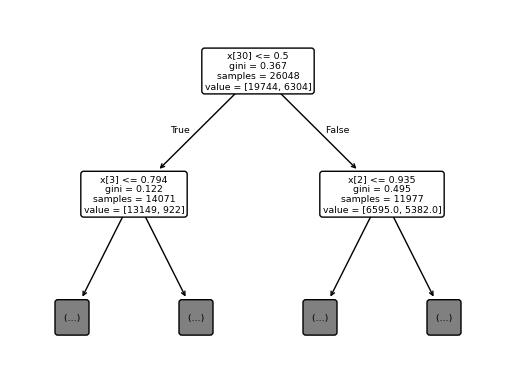

In [ ]:
plot_tree(tree_classifier, rounded=True, max_depth=1)